Analysed Charging Stations Data and finded key insights

In [20]:
import pandas as pd
import numpy as np

In [21]:
df = pd.read_csv("Charging_Stations.csv")
df

,Station_ID,City,Zone,Chargers_Available,Avg_Wait_Time_Min
0,CS200,Mumbai,10,2,13
1,CS201,Bengaluru,7,5,19
2,CS202,Bengaluru,7,4,33
3,CS203,Mumbai,2,7,19
4,CS204,Hyderabad,7,7,23
5,CS205,Bengaluru,4,6,7
6,CS206,Hyderabad,1,4,19
7,CS207,Bengaluru,8,2,31
8,CS208,Hyderabad,8,2,19
9,CS209,Hyderabad,3,6,5


In [22]:
df.columns

Index(['Station_ID', 'City', 'Zone', 'Chargers_Available',
       'Avg_Wait_Time_Min'],
      dtype='str')

In [23]:
import matplotlib.pyplot as plt

Full Correlation Matrix:
                    City_encoded  Zone_encoded  Chargers_Available  \
City_encoded            1.000000     -0.252888           -0.042699   
Zone_encoded           -0.252888      1.000000           -0.236444   
Chargers_Available     -0.042699     -0.236444            1.000000   
Avg_Wait_Time_Min       0.072288      0.010828            0.110634   

                    Avg_Wait_Time_Min  
City_encoded                 0.072288  
Zone_encoded                 0.010828  
Chargers_Available           0.110634  
Avg_Wait_Time_Min            1.000000  



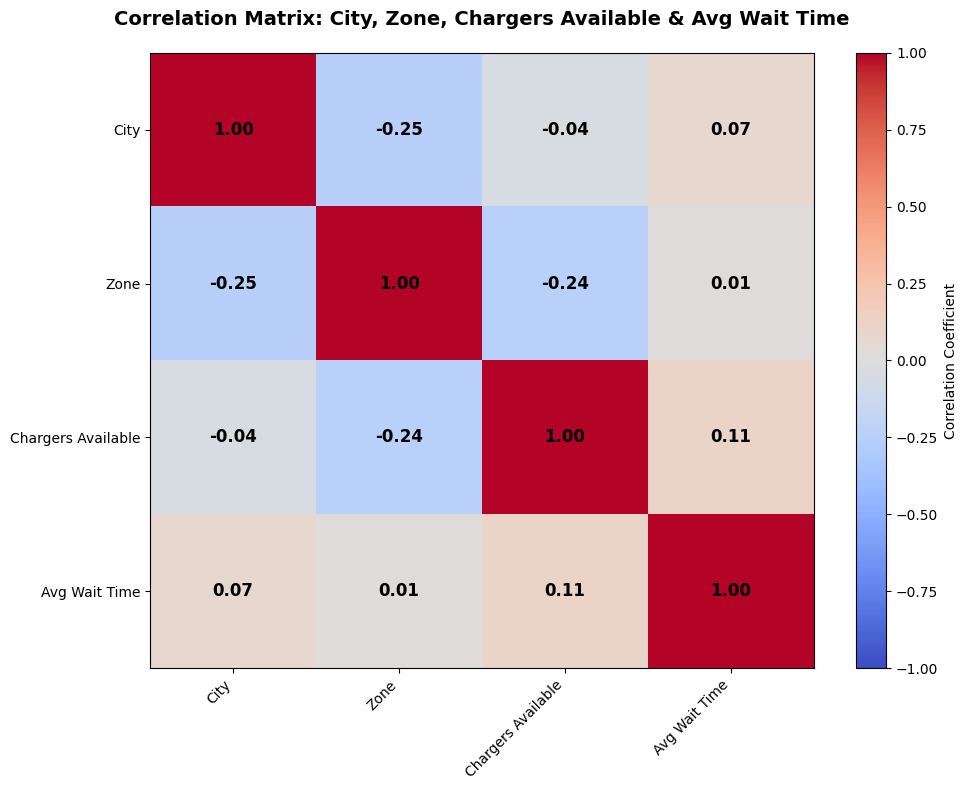

In [24]:
# Create correlation matrix for all numeric columns including encoded categorical variables
# First, let's encode categorical variables (City and Zone) numerically for correlation analysis
df_encoded = df.copy()
df_encoded['City_encoded'] = pd.Categorical(df_encoded['City']).codes
df_encoded['Zone_encoded'] = df_encoded['Zone']

# Select columns for correlation matrix
correlation_cols = ['City_encoded', 'Zone_encoded', 'Chargers_Available', 'Avg_Wait_Time_Min']
full_correlation_matrix = df_encoded[correlation_cols].corr()

# Display the correlation matrix
print("Full Correlation Matrix:")
print(full_correlation_matrix)
print()

# Create a heatmap visualization
plt.figure(figsize=(10, 8))
im = plt.imshow(full_correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# Set ticks and labels
tick_labels = ['City', 'Zone', 'Chargers Available', 'Avg Wait Time']
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45, ha='right')
plt.yticks(range(len(tick_labels)), tick_labels)

# Add correlation values to heatmap
for i in range(len(tick_labels)):
    for j in range(len(tick_labels)):
        plt.text(j, i, f'{full_correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='black', fontweight='bold', fontsize=12)

plt.colorbar(im, label='Correlation Coefficient')
plt.title('Correlation Matrix: City, Zone, Chargers Available & Avg Wait Time', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

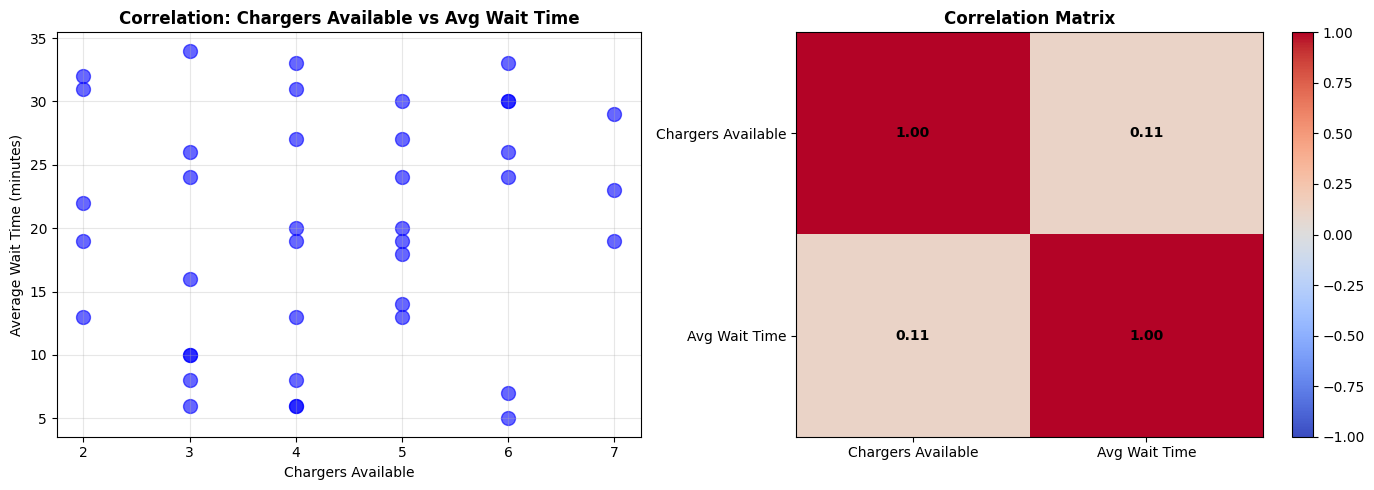

Correlation Matrix:
                    Chargers_Available  Avg_Wait_Time_Min
Chargers_Available            1.000000           0.110634
Avg_Wait_Time_Min             0.110634           1.000000


In [25]:
import matplotlib.pyplot as plt

# Create a correlation matrix for numeric columns
correlation_matrix = df[['Chargers_Available', 'Avg_Wait_Time_Min']].corr()

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Scatter plot - Chargers Available vs Avg Wait Time
axes[0].scatter(df['Chargers_Available'], df['Avg_Wait_Time_Min'], alpha=0.6, s=100, color='blue')
axes[0].set_xlabel('Chargers Available')
axes[0].set_ylabel('Average Wait Time (minutes)')
axes[0].set_title('Correlation: Chargers Available vs Avg Wait Time', fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# Plot 2: Heatmap of correlation matrix
im = axes[1].imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
axes[1].set_xticks([0, 1])
axes[1].set_yticks([0, 1])
axes[1].set_xticklabels(['Chargers Available', 'Avg Wait Time'])
axes[1].set_yticklabels(['Chargers Available', 'Avg Wait Time'])
axes[1].set_title('Correlation Matrix', fontsize=12, fontweight='bold')

# Add correlation values to heatmap
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                    ha='center', va='center', color='black', fontweight='bold')

plt.colorbar(im, ax=axes[1])
plt.tight_layout()
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

In [26]:
# Chargers available citywise
chargers_city = df.groupby('City')['Chargers_Available'].sum()
print("Total Chargers Available by City:")
print(chargers_city)
print()

# Chargers available zonewise
chargers_zone = df.groupby('Zone')['Chargers_Available'].sum()
print("Total Chargers Available by Zone:")
print(chargers_zone)

Total Chargers Available by City:
City
Bengaluru    45
Delhi        52
Hyderabad    49
Mumbai       27
Name: Chargers_Available, dtype: int64

Total Chargers Available by Zone:
Zone
1     32
2     17
3     26
4      9
5      7
6      8
7     37
8     19
9     13
10     5
Name: Chargers_Available, dtype: int64


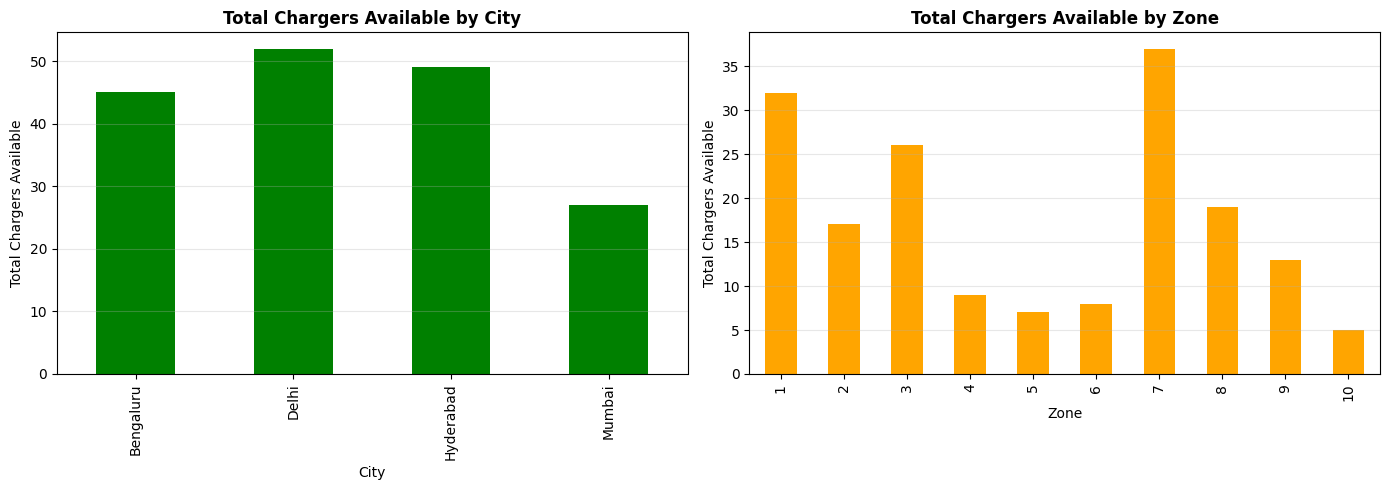

In [27]:
# Create visualizations for chargers available
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Chargers available by City
chargers_city.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title('Total Chargers Available by City', fontsize=12, fontweight='bold')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Total Chargers Available')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Chargers available by Zone
chargers_zone.plot(kind='bar', ax=axes[1], color='orange')
axes[1].set_title('Total Chargers Available by Zone', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Zone')
axes[1].set_ylabel('Total Chargers Available')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

Average Wait Time by City:
City
Bengaluru    20.400000
Delhi        19.083333
Hyderabad    19.333333
Mumbai       23.333333
Name: Avg_Wait_Time_Min, dtype: float64

Average Wait Time by Zone:
Zone
1     24.714286
2     14.250000
3     13.200000
4     11.500000
5     23.000000
6     29.000000
7     26.428571
8     21.500000
9     15.000000
10    11.500000
Name: Avg_Wait_Time_Min, dtype: float64



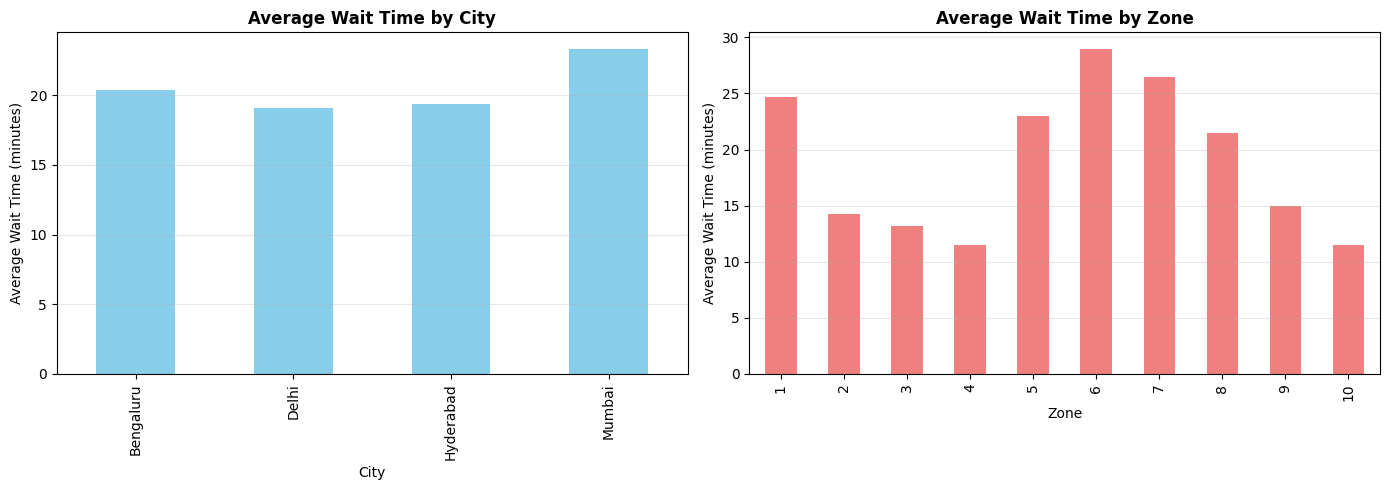

In [28]:
import matplotlib.pyplot as plt

# Average wait time by City
avg_wait_city = df.groupby('City')['Avg_Wait_Time_Min'].mean()
print("Average Wait Time by City:")
print(avg_wait_city)
print()

# Average wait time by Zone
avg_wait_zone = df.groupby('Zone')['Avg_Wait_Time_Min'].mean()
print("Average Wait Time by Zone:")
print(avg_wait_zone)
print()

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Average wait time by City
avg_wait_city.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Average Wait Time by City', fontsize=12, fontweight='bold')
axes[0].set_xlabel('City')
axes[0].set_ylabel('Average Wait Time (minutes)')
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Average wait time by Zone
avg_wait_zone.plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('Average Wait Time by Zone', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Zone')
axes[1].set_ylabel('Average Wait Time (minutes)')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [29]:
# Average wait time by City
avg_wait_city = df.groupby('City')['Avg_Wait_Time_Min'].mean()
print("Average Wait Time by City:")
print(avg_wait_city)
print()

# Average wait time by Zone
avg_wait_zone = df.groupby('Zone')['Avg_Wait_Time_Min'].mean()
print("Average Wait Time by Zone:")
print(avg_wait_zone)
df.Zone.unique()

Average Wait Time by City:
City
Bengaluru    20.400000
Delhi        19.083333
Hyderabad    19.333333
Mumbai       23.333333
Name: Avg_Wait_Time_Min, dtype: float64

Average Wait Time by Zone:
Zone
1     24.714286
2     14.250000
3     13.200000
4     11.500000
5     23.000000
6     29.000000
7     26.428571
8     21.500000
9     15.000000
10    11.500000
Name: Avg_Wait_Time_Min, dtype: float64


array([10,  7,  2,  4,  1,  8,  3,  9,  5,  6])

In [30]:
df.City.value_counts()

City
Hyderabad    12
Delhi        12
Bengaluru    10
Mumbai        6
Name: count, dtype: int64

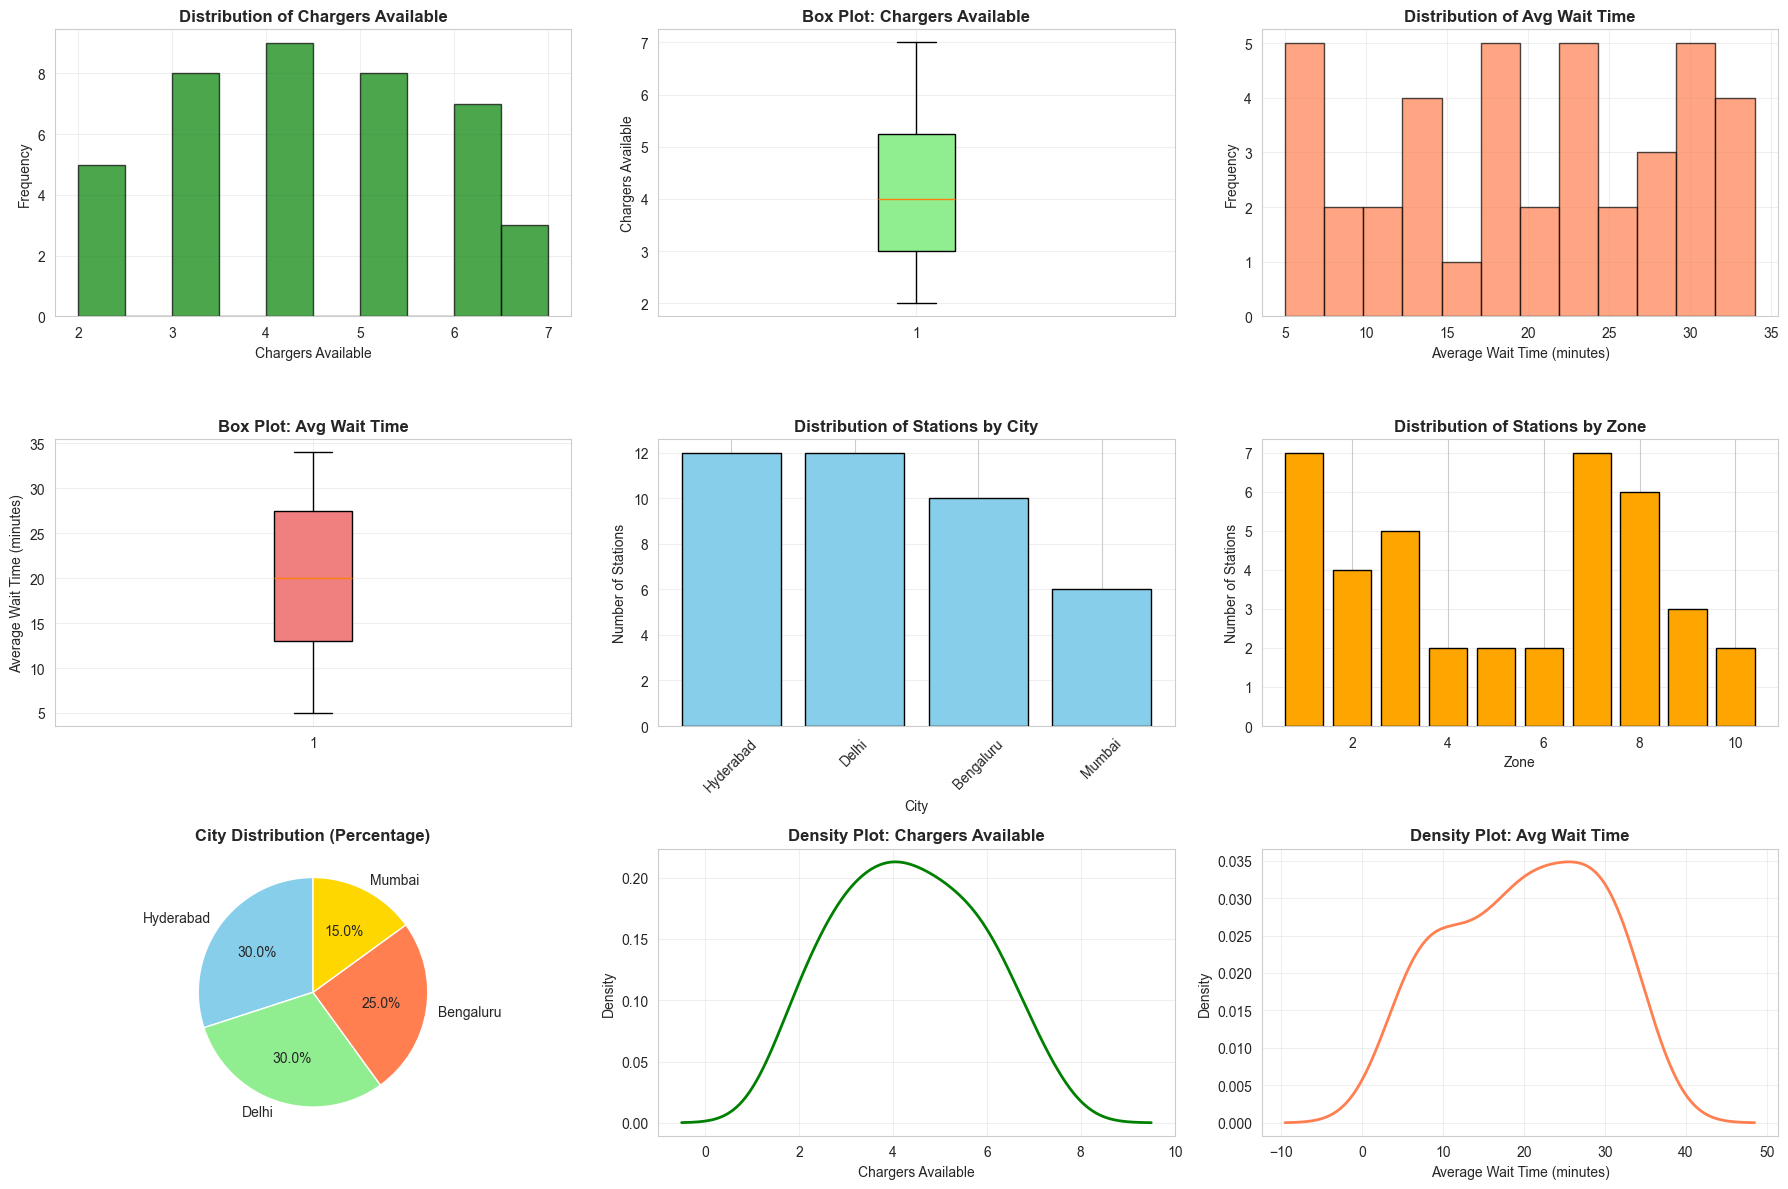

UNIVARIATE ANALYSIS - STATISTICAL SUMMARY

1. Chargers Available - Statistics:
count    40.000000
mean      4.325000
std       1.491643
min       2.000000
25%       3.000000
50%       4.000000
75%       5.250000
max       7.000000
Name: Chargers_Available, dtype: float64
Mode: 4
Skewness: 0.0896
Kurtosis: -0.9422

2. Average Wait Time - Statistics:
count    40.000000
mean     20.125000
std       9.070062
min       5.000000
25%      13.000000
50%      20.000000
75%      27.500000
max      34.000000
Name: Avg_Wait_Time_Min, dtype: float64
Mode: 19
Skewness: -0.1875
Kurtosis: -1.2242

3. City - Frequency Distribution:
City
Hyderabad    12
Delhi        12
Bengaluru    10
Mumbai        6
Name: count, dtype: int64

4. Zone - Frequency Distribution:
Zone
1     7
2     4
3     5
4     2
5     2
6     2
7     7
8     6
9     3
10    2
Name: count, dtype: int64


In [31]:
import seaborn as sns

# Univariate Analysis for all variables in the dataset

import matplotlib.pyplot as plt

# Set style for better visualizations
sns.set_style("whitegrid")

# Create a comprehensive figure with subplots
fig = plt.figure(figsize=(18, 12))

# 1. Distribution of Chargers Available
plt.subplot(3, 3, 1)
plt.hist(df['Chargers_Available'], bins=10, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of Chargers Available', fontweight='bold')
plt.xlabel('Chargers Available')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# 2. Box plot of Chargers Available
plt.subplot(3, 3, 2)
plt.boxplot(df['Chargers_Available'], vert=True, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen'))
plt.title('Box Plot: Chargers Available', fontweight='bold')
plt.ylabel('Chargers Available')
plt.grid(alpha=0.3)

# 3. Distribution of Average Wait Time
plt.subplot(3, 3, 3)
plt.hist(df['Avg_Wait_Time_Min'], bins=12, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Avg Wait Time', fontweight='bold')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# 4. Box plot of Average Wait Time
plt.subplot(3, 3, 4)
plt.boxplot(df['Avg_Wait_Time_Min'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'))
plt.title('Box Plot: Avg Wait Time', fontweight='bold')
plt.ylabel('Average Wait Time (minutes)')
plt.grid(alpha=0.3)

# 5. City distribution (Count plot)
plt.subplot(3, 3, 5)
city_counts = df['City'].value_counts()
plt.bar(city_counts.index, city_counts.values, color='skyblue', edgecolor='black')
plt.title('Distribution of Stations by City', fontweight='bold')
plt.xlabel('City')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 6. Zone distribution (Count plot)
plt.subplot(3, 3, 6)
zone_counts = df['Zone'].value_counts().sort_index()
plt.bar(zone_counts.index, zone_counts.values, color='orange', edgecolor='black')
plt.title('Distribution of Stations by Zone', fontweight='bold')
plt.xlabel('Zone')
plt.ylabel('Number of Stations')
plt.grid(axis='y', alpha=0.3)

# 7. Pie chart for City distribution
plt.subplot(3, 3, 7)
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'lightgreen', 'coral', 'gold'], startangle=90)
plt.title('City Distribution (Percentage)', fontweight='bold')

# 8. Density plot for Chargers Available
plt.subplot(3, 3, 8)
df['Chargers_Available'].plot(kind='density', color='green', linewidth=2)
plt.title('Density Plot: Chargers Available', fontweight='bold')
plt.xlabel('Chargers Available')
plt.ylabel('Density')
plt.grid(alpha=0.3)

# 9. Density plot for Average Wait Time
plt.subplot(3, 3, 9)
df['Avg_Wait_Time_Min'].plot(kind='density', color='coral', linewidth=2)
plt.title('Density Plot: Avg Wait Time', fontweight='bold')
plt.xlabel('Average Wait Time (minutes)')
plt.ylabel('Density')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical summaries
print("="*60)
print("UNIVARIATE ANALYSIS - STATISTICAL SUMMARY")
print("="*60)
print("\n1. Chargers Available - Statistics:")
print(df['Chargers_Available'].describe())
print(f"Mode: {df['Chargers_Available'].mode().values[0]}")
print(f"Skewness: {df['Chargers_Available'].skew():.4f}")
print(f"Kurtosis: {df['Chargers_Available'].kurtosis():.4f}")

print("\n2. Average Wait Time - Statistics:")
print(df['Avg_Wait_Time_Min'].describe())
print(f"Mode: {df['Avg_Wait_Time_Min'].mode().values[0]}")
print(f"Skewness: {df['Avg_Wait_Time_Min'].skew():.4f}")
print(f"Kurtosis: {df['Avg_Wait_Time_Min'].kurtosis():.4f}")

print("\n3. City - Frequency Distribution:")
print(df['City'].value_counts())


print("\n4. Zone - Frequency Distribution:")
print(df['Zone'].value_counts().sort_index())
print("="*60)

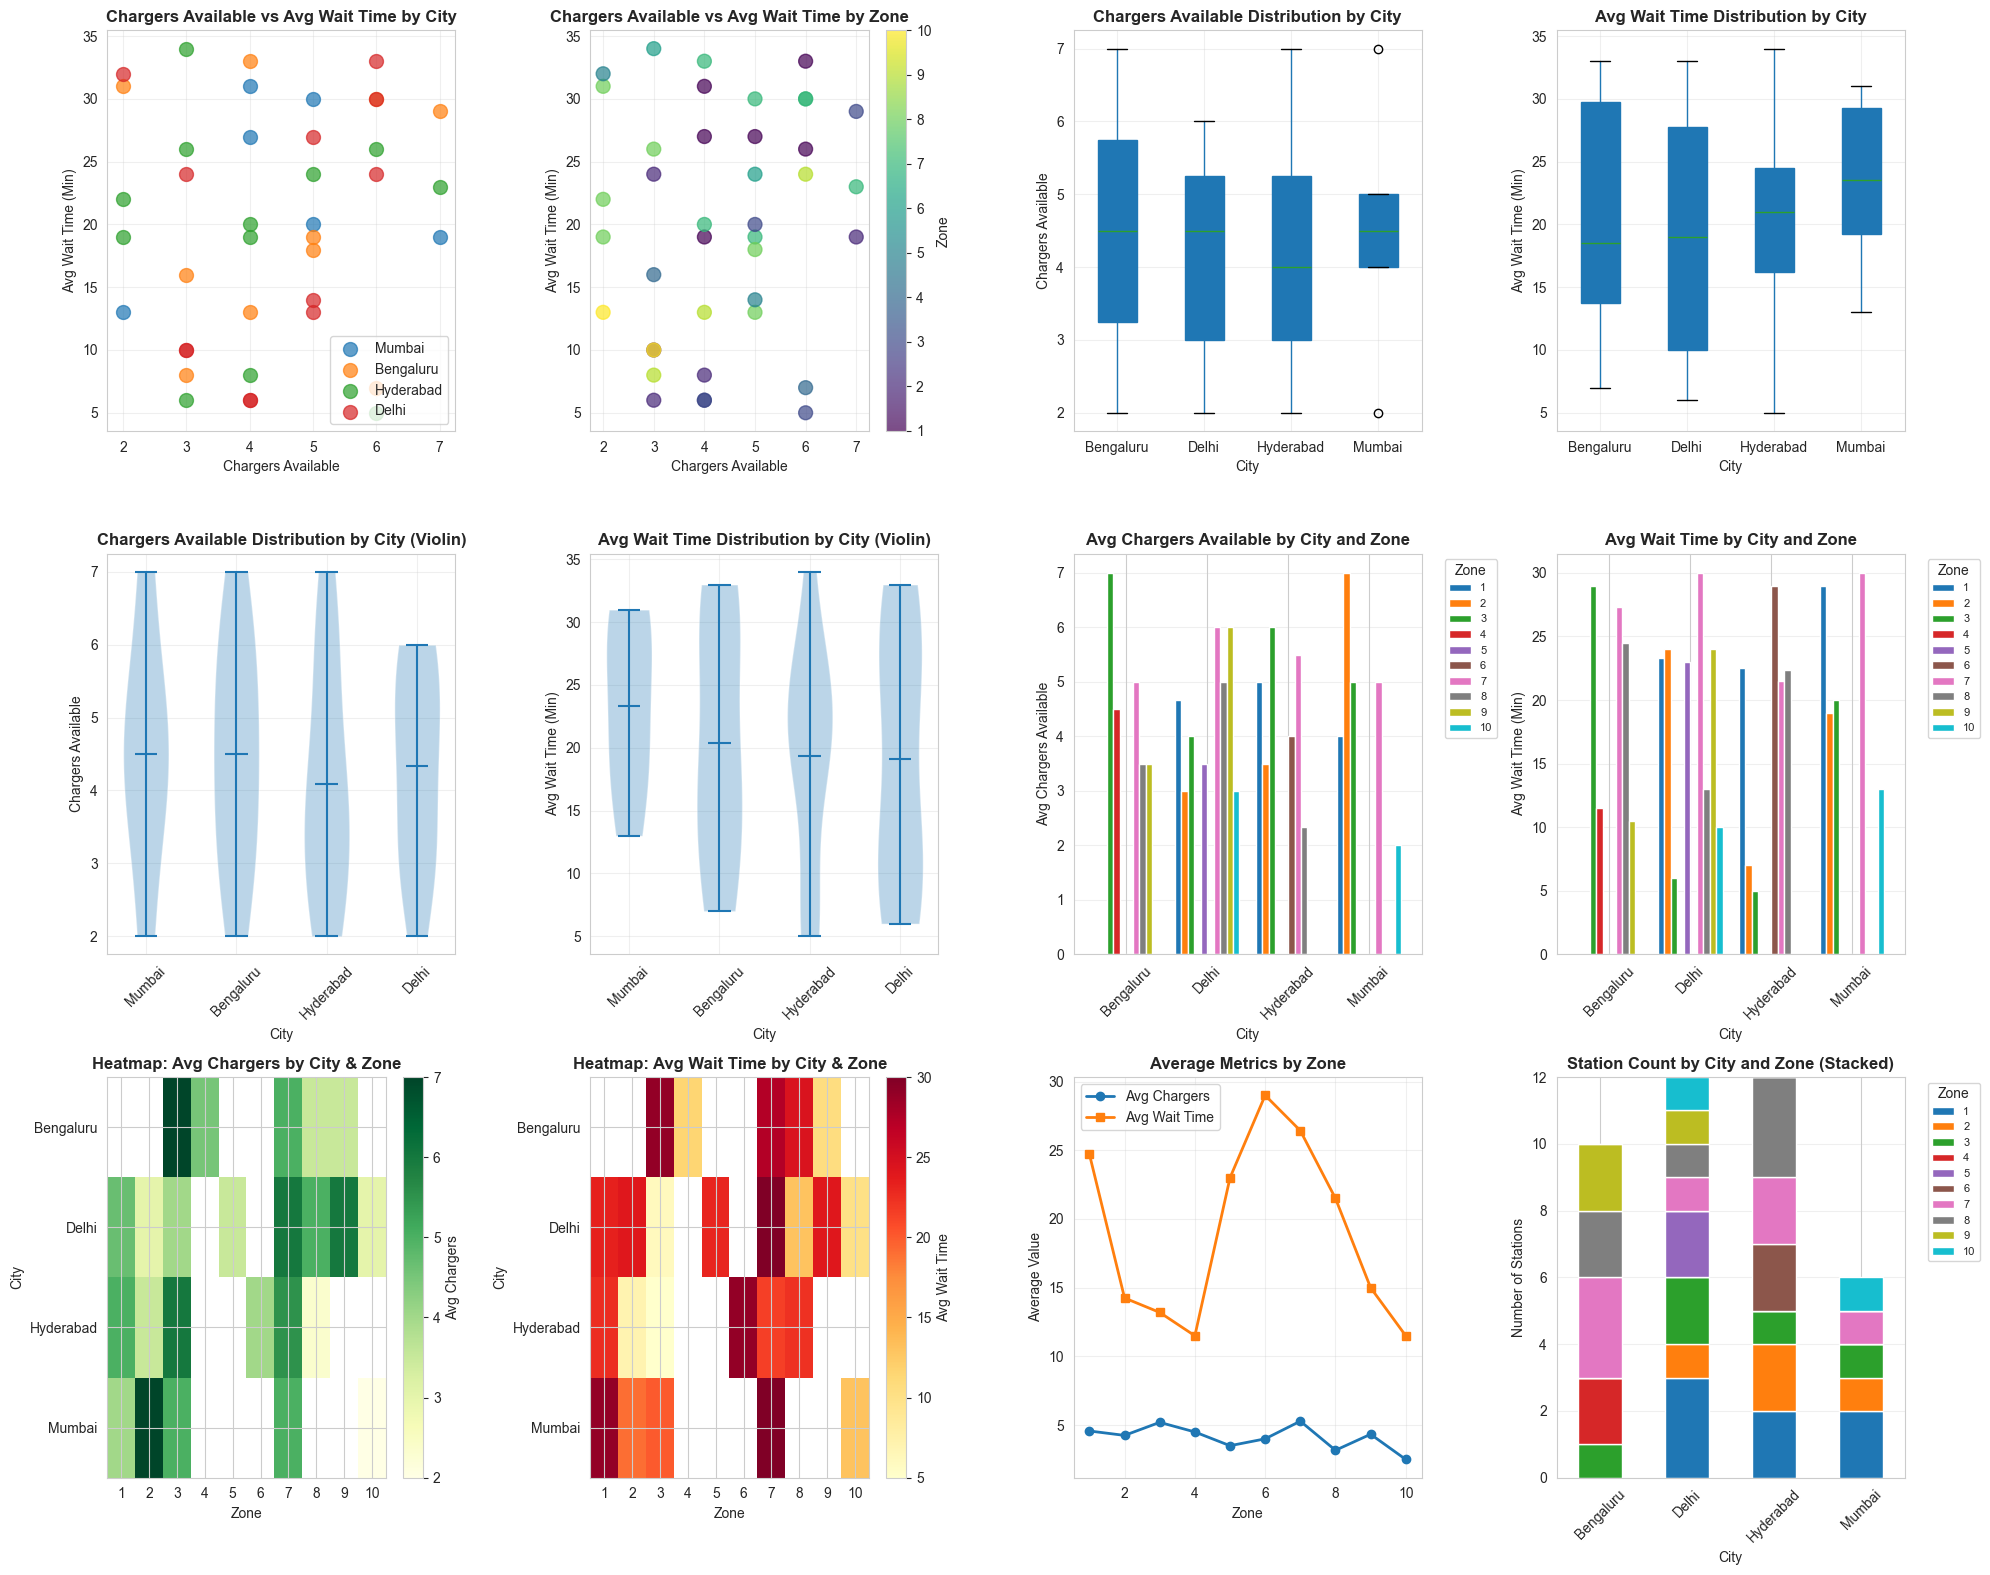

BIVARIATE ANALYSIS - STATISTICAL SUMMARY

1. Correlation Analysis:

Correlation between Chargers Available and Avg Wait Time:
Pearson Correlation: 0.1106

2. Chargers Available by City:
               mean  median       std  min  max
City                                           
Bengaluru  4.500000     4.5  1.581139    2    7
Delhi      4.333333     4.5  1.370689    2    6
Hyderabad  4.083333     4.0  1.621354    2    7
Mumbai     4.500000     4.5  1.643168    2    7

3. Avg Wait Time by City:
                mean  median        std  min  max
City                                             
Bengaluru  20.400000    18.5   9.731963    7   33
Delhi      19.083333    19.0  10.273163    6   33
Hyderabad  19.333333    21.0   8.835191    5   34
Mumbai     23.333333    23.5   7.118052   13   31

4. Chargers Available by Zone:
          mean  median       std  min  max
Zone                                      
1     4.571429     4.0  1.133893    3    6
2     4.250000     3.5  1.892969    3 

In [32]:
# Bivariate Analysis for all variables in the dataset

# Create a comprehensive figure with subplots for bivariate analysis
fig = plt.figure(figsize=(20, 16))

# 1. Scatter plot: Chargers Available vs Avg Wait Time (colored by City)
plt.subplot(3, 4, 1)
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Chargers_Available'], city_data['Avg_Wait_Time_Min'], 
                label=city, alpha=0.7, s=100)
plt.xlabel('Chargers Available')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Chargers Available vs Avg Wait Time by City', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 2. Scatter plot: Chargers Available vs Avg Wait Time (colored by Zone)
plt.subplot(3, 4, 2)
scatter = plt.scatter(df['Chargers_Available'], df['Avg_Wait_Time_Min'], 
                     c=df['Zone'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Zone')
plt.xlabel('Chargers Available')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Chargers Available vs Avg Wait Time by Zone', fontweight='bold')
plt.grid(alpha=0.3)

# 3. Box plot: Chargers Available by City
plt.subplot(3, 4, 3)
df.boxplot(column='Chargers_Available', by='City', ax=plt.gca(), patch_artist=True)
plt.xlabel('City')
plt.ylabel('Chargers Available')
plt.title('Chargers Available Distribution by City', fontweight='bold')
plt.suptitle('')
plt.grid(alpha=0.3)

# 4. Box plot: Avg Wait Time by City
plt.subplot(3, 4, 4)
df.boxplot(column='Avg_Wait_Time_Min', by='City', ax=plt.gca(), patch_artist=True)
plt.xlabel('City')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Avg Wait Time Distribution by City', fontweight='bold')
plt.suptitle('')
plt.grid(alpha=0.3)

# 5. Violin plot: Chargers Available by City
plt.subplot(3, 4, 5)
cities = df['City'].unique()
chargers_by_city = [df[df['City'] == city]['Chargers_Available'].values for city in cities]
parts = plt.violinplot(chargers_by_city, positions=range(len(cities)), showmeans=True)
plt.xticks(range(len(cities)), cities, rotation=45)
plt.xlabel('City')
plt.ylabel('Chargers Available')
plt.title('Chargers Available Distribution by City (Violin)', fontweight='bold')
plt.grid(alpha=0.3)

# 6. Violin plot: Avg Wait Time by City
plt.subplot(3, 4, 6)
wait_by_city = [df[df['City'] == city]['Avg_Wait_Time_Min'].values for city in cities]
parts = plt.violinplot(wait_by_city, positions=range(len(cities)), showmeans=True)
plt.xticks(range(len(cities)), cities, rotation=45)
plt.xlabel('City')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Avg Wait Time Distribution by City (Violin)', fontweight='bold')
plt.grid(alpha=0.3)

# 7. Grouped bar chart: Avg Chargers by City and Zone (top zones)
plt.subplot(3, 4, 7)
city_zone_chargers = df.groupby(['City', 'Zone'])['Chargers_Available'].mean().unstack(fill_value=0)
city_zone_chargers.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.xlabel('City')
plt.ylabel('Avg Chargers Available')
plt.title('Avg Chargers Available by City and Zone', fontweight='bold')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 8. Grouped bar chart: Avg Wait Time by City and Zone
plt.subplot(3, 4, 8)
city_zone_wait = df.groupby(['City', 'Zone'])['Avg_Wait_Time_Min'].mean().unstack(fill_value=0)
city_zone_wait.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.xlabel('City')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Avg Wait Time by City and Zone', fontweight='bold')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# 9. Heatmap: Avg Chargers by City and Zone
plt.subplot(3, 4, 9)
pivot_chargers = df.pivot_table(values='Chargers_Available', index='City', columns='Zone', aggfunc='mean')
im1 = plt.imshow(pivot_chargers, cmap='YlGn', aspect='auto')
plt.colorbar(im1, label='Avg Chargers')
plt.yticks(range(len(pivot_chargers.index)), pivot_chargers.index)
plt.xticks(range(len(pivot_chargers.columns)), pivot_chargers.columns)
plt.xlabel('Zone')
plt.ylabel('City')
plt.title('Heatmap: Avg Chargers by City & Zone', fontweight='bold')

# 10. Heatmap: Avg Wait Time by City and Zone
plt.subplot(3, 4, 10)
pivot_wait = df.pivot_table(values='Avg_Wait_Time_Min', index='City', columns='Zone', aggfunc='mean')
im2 = plt.imshow(pivot_wait, cmap='YlOrRd', aspect='auto')
plt.colorbar(im2, label='Avg Wait Time')
plt.yticks(range(len(pivot_wait.index)), pivot_wait.index)
plt.xticks(range(len(pivot_wait.columns)), pivot_wait.columns)
plt.xlabel('Zone')
plt.ylabel('City')
plt.title('Heatmap: Avg Wait Time by City & Zone', fontweight='bold')

# 11. Line plot: Avg metrics by Zone
plt.subplot(3, 4, 11)
zone_metrics = df.groupby('Zone')[['Chargers_Available', 'Avg_Wait_Time_Min']].mean()
plt.plot(zone_metrics.index, zone_metrics['Chargers_Available'], marker='o', label='Avg Chargers', linewidth=2)
plt.plot(zone_metrics.index, zone_metrics['Avg_Wait_Time_Min'], marker='s', label='Avg Wait Time', linewidth=2)
plt.xlabel('Zone')
plt.ylabel('Average Value')
plt.title('Average Metrics by Zone', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 12. Stacked bar chart: Count of stations by City and Zone
plt.subplot(3, 4, 12)
city_zone_count = df.groupby(['City', 'Zone']).size().unstack(fill_value=0)
city_zone_count.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
plt.xlabel('City')
plt.ylabel('Number of Stations')
plt.title('Station Count by City and Zone (Stacked)', fontweight='bold')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistical summaries for bivariate relationships
print("="*80)
print("BIVARIATE ANALYSIS - STATISTICAL SUMMARY")
print("="*80)

print("\n1. Correlation Analysis:")
print("\nCorrelation between Chargers Available and Avg Wait Time:")
print(f"Pearson Correlation: {df['Chargers_Available'].corr(df['Avg_Wait_Time_Min']):.4f}")

print("\n2. Chargers Available by City:")
print(df.groupby('City')['Chargers_Available'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n3. Avg Wait Time by City:")
print(df.groupby('City')['Avg_Wait_Time_Min'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n4. Chargers Available by Zone:")
print(df.groupby('Zone')['Chargers_Available'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n5. Avg Wait Time by Zone:")
print(df.groupby('Zone')['Avg_Wait_Time_Min'].agg(['mean', 'median', 'std', 'min', 'max']))

print("\n6. City-Zone Combination Analysis:")
print("\nAverage Chargers Available by City and Zone:")
print(df.groupby(['City', 'Zone'])['Chargers_Available'].mean().unstack(fill_value=0))

print("\nAverage Wait Time by City and Zone:")
print(df.groupby(['City', 'Zone'])['Avg_Wait_Time_Min'].mean().unstack(fill_value=0))

print("\n7. Station Count by City and Zone:")
print(df.groupby(['City', 'Zone']).size().unstack(fill_value=0))

print("="*80)

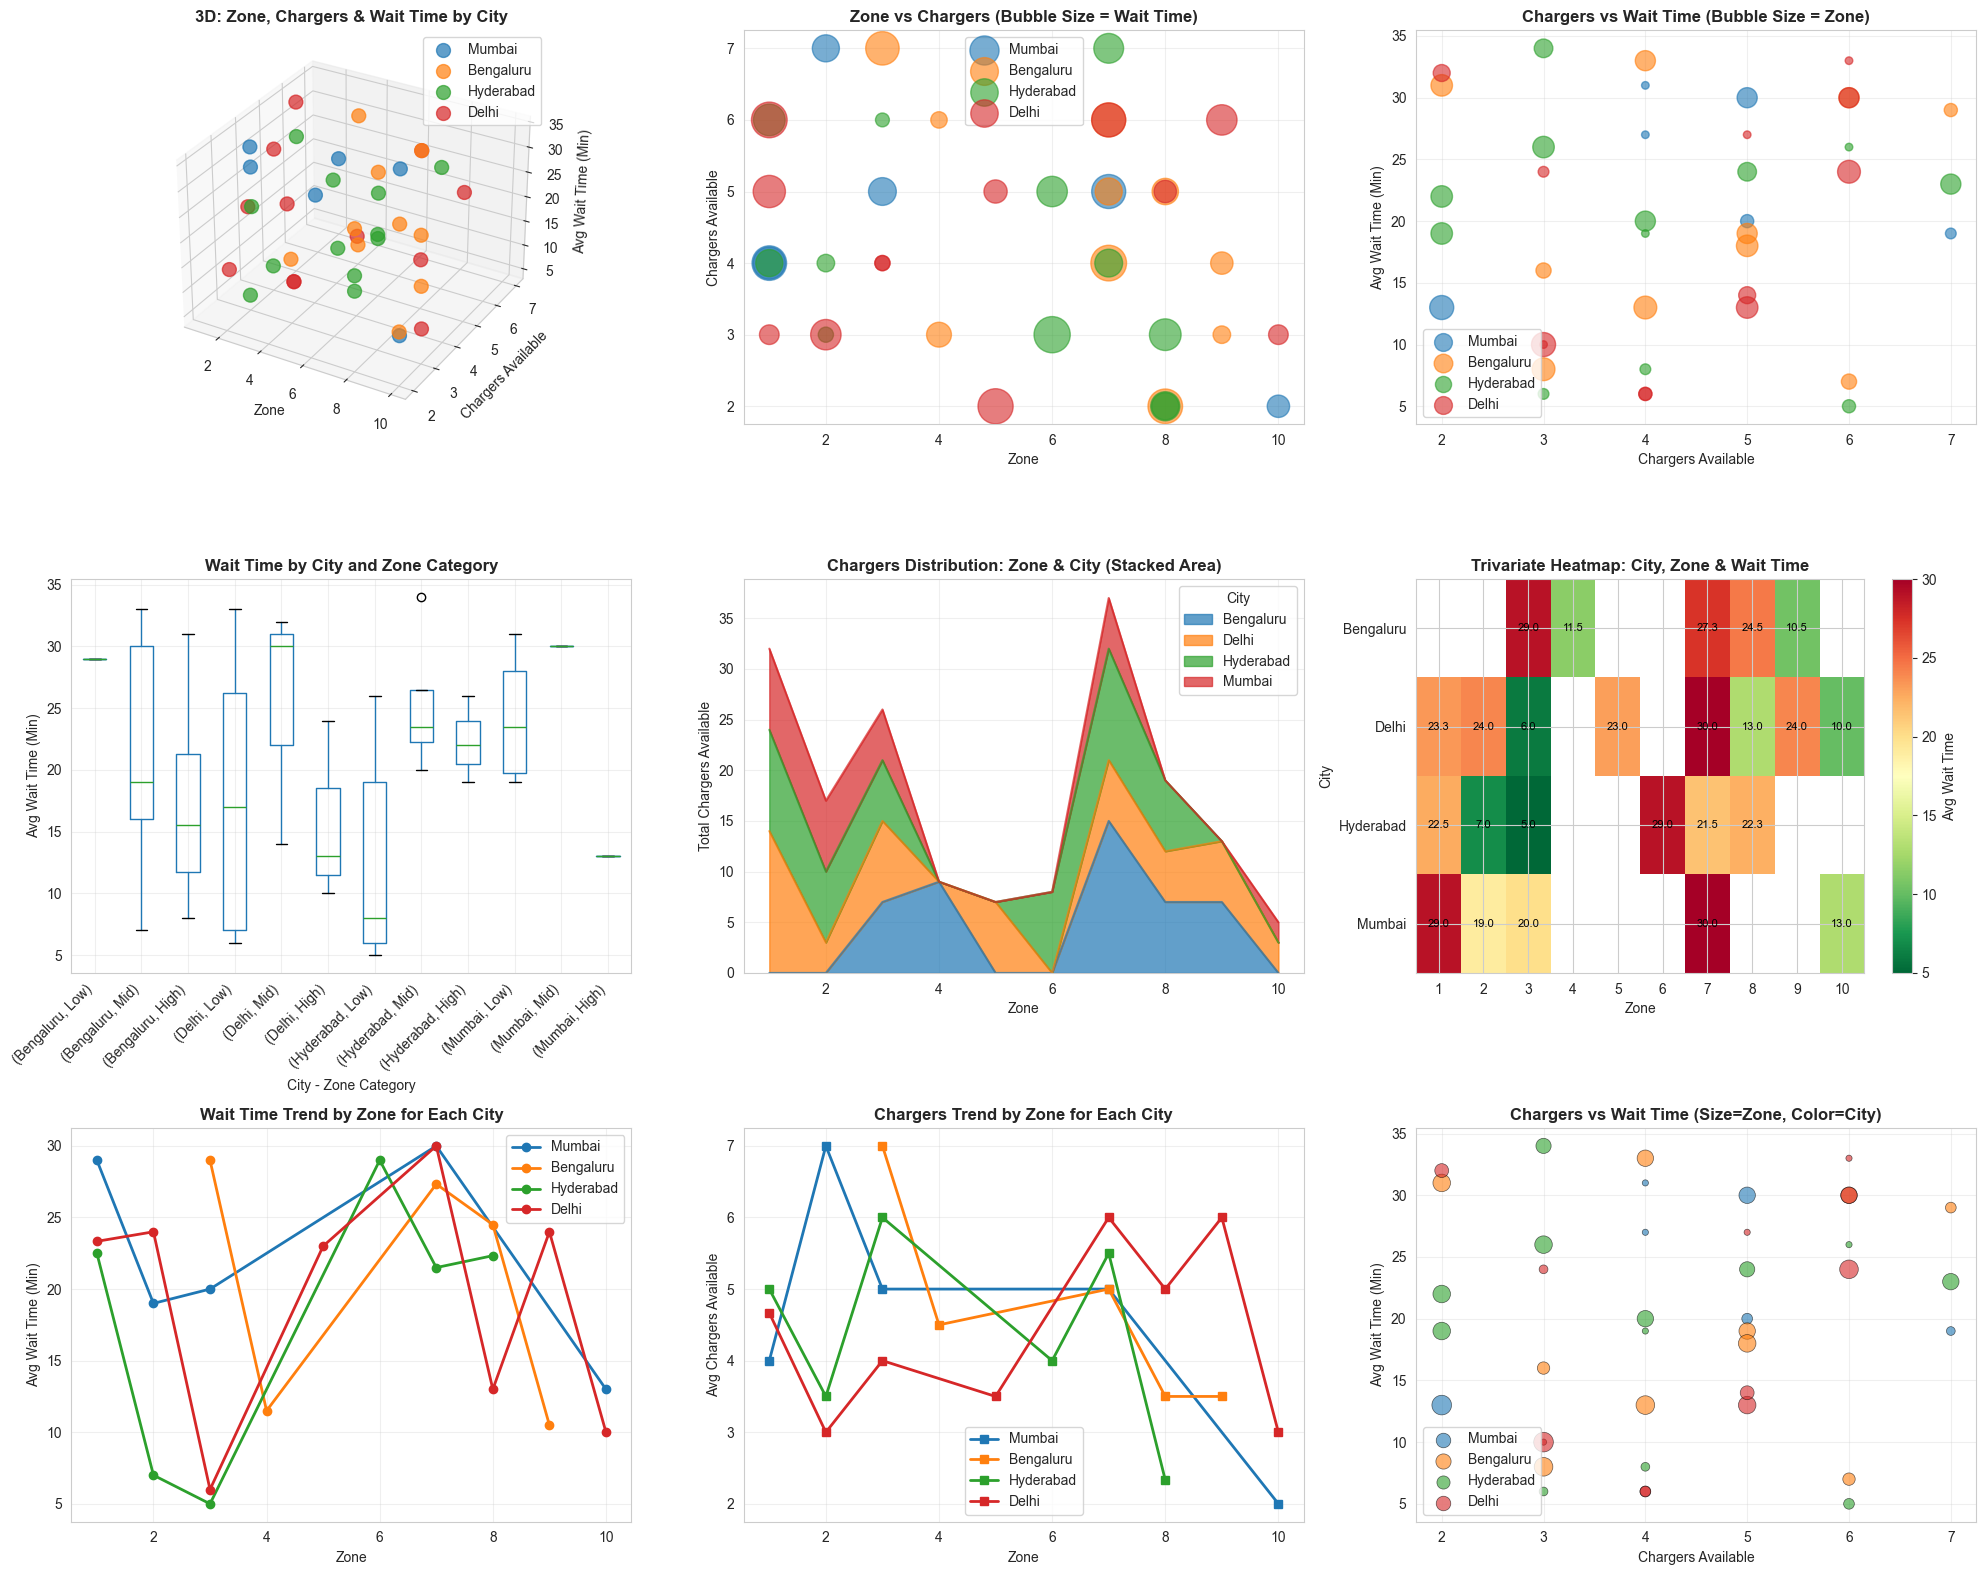

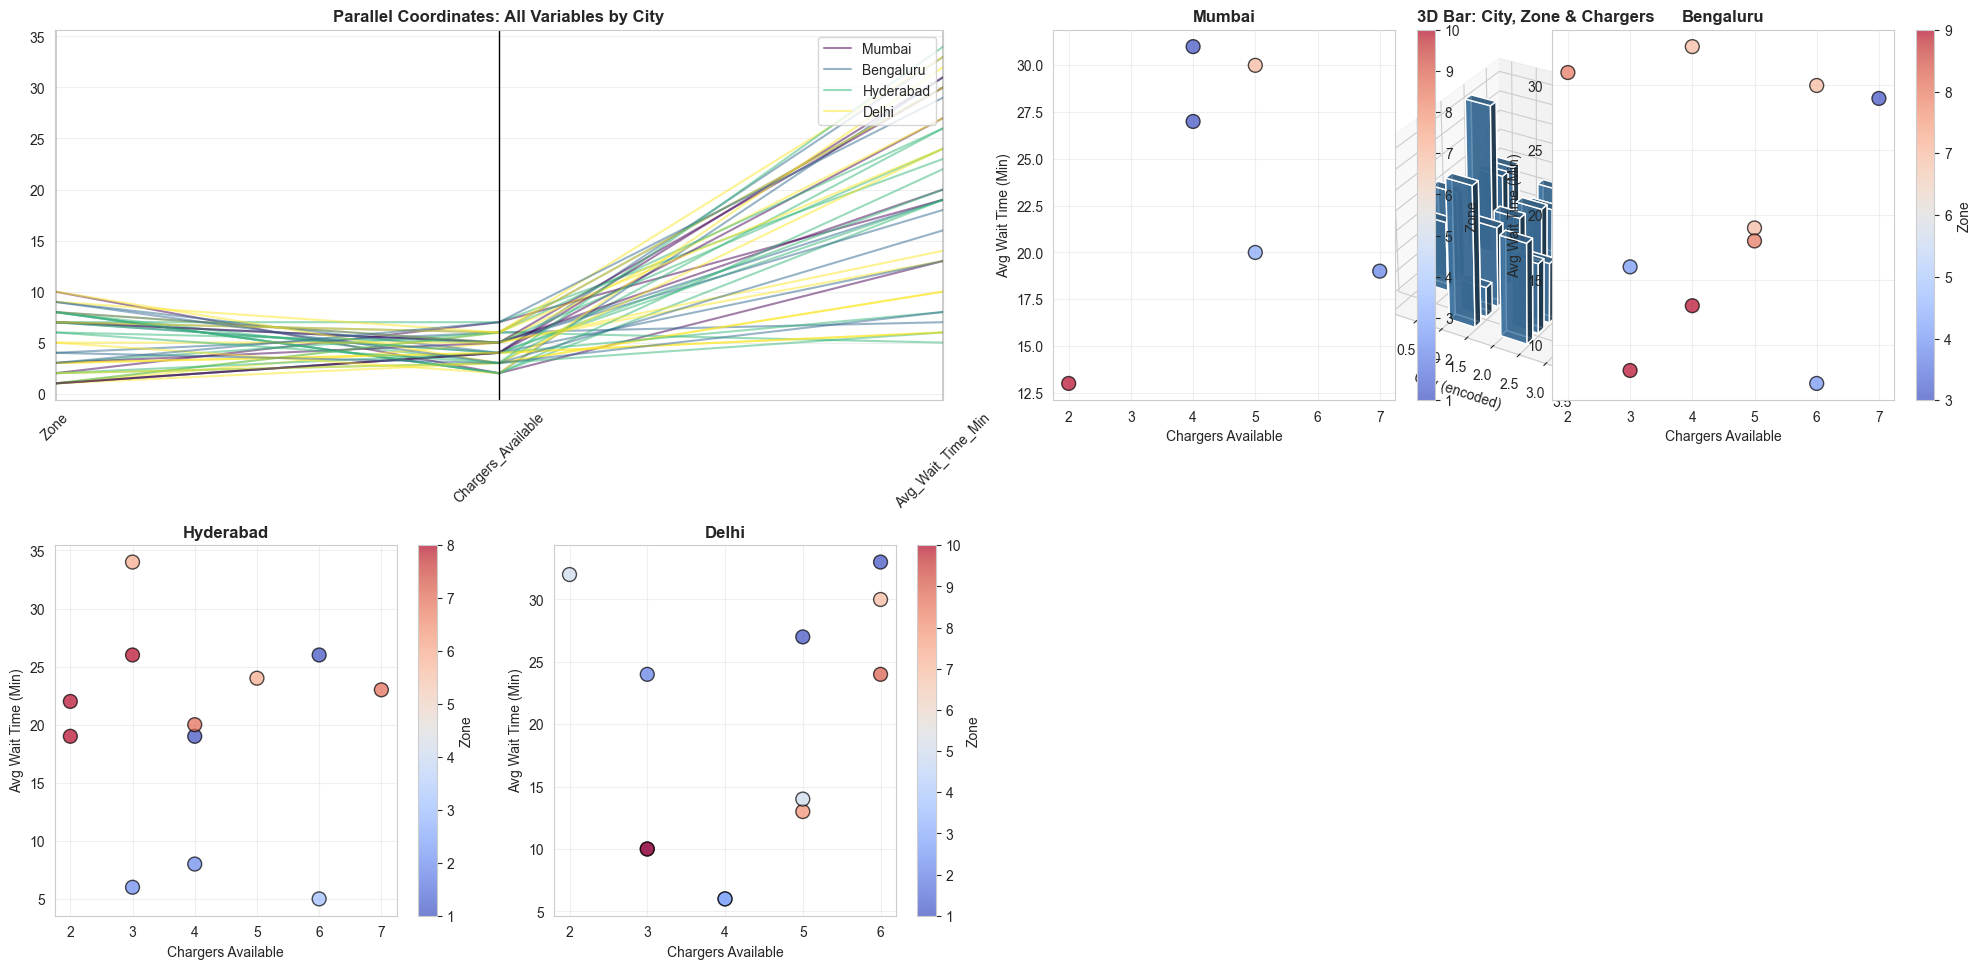

TRIVARIATE ANALYSIS - STATISTICAL SUMMARY

1. Summary Statistics by City and Zone:
               Chargers_Available       Avg_Wait_Time_Min      
                             mean count              mean count
City      Zone                                                 
Bengaluru 3              7.000000     1         29.000000     1
          4              4.500000     2         11.500000     2
          7              5.000000     3         27.333333     3
          8              3.500000     2         24.500000     2
          9              3.500000     2         10.500000     2
Delhi     1              4.666667     3         23.333333     3
          2              3.000000     1         24.000000     1
          3              4.000000     2          6.000000     2
          5              3.500000     2         23.000000     2
          7              6.000000     1         30.000000     1
          8              5.000000     1         13.000000     1
          9          

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates

# Trivariate Analysis for all variables in the dataset

# Create comprehensive trivariate visualizations
fig = plt.figure(figsize=(20, 16))

# 1. 3D Scatter plot: City, Chargers Available, Avg Wait Time

ax1 = fig.add_subplot(3, 3, 1, projection='3d')
for idx, city in enumerate(df['City'].unique()):
    city_data = df[df['City'] == city]
    ax1.scatter(city_data['Zone'], city_data['Chargers_Available'], 
                city_data['Avg_Wait_Time_Min'], label=city, s=100, alpha=0.7)
ax1.set_xlabel('Zone')
ax1.set_ylabel('Chargers Available')
ax1.set_zlabel('Avg Wait Time (Min)')
ax1.set_title('3D: Zone, Chargers & Wait Time by City', fontweight='bold')
ax1.legend()

# 2. Bubble chart: Zone vs Chargers (size=Wait Time, color=City)
plt.subplot(3, 3, 2)
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Zone'], city_data['Chargers_Available'], 
                s=city_data['Avg_Wait_Time_Min']*20, alpha=0.6, label=city)
plt.xlabel('Zone')
plt.ylabel('Chargers Available')
plt.title('Zone vs Chargers (Bubble Size = Wait Time)', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 3. Bubble chart: Chargers vs Wait Time (size=Zone, color=City)
plt.subplot(3, 3, 3)
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Chargers_Available'], city_data['Avg_Wait_Time_Min'], 
                s=city_data['Zone']*30, alpha=0.6, label=city)
plt.xlabel('Chargers Available')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Chargers vs Wait Time (Bubble Size = Zone)', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 4. Grouped box plot: Wait Time by City and Zone category (Low/Mid/High)
plt.subplot(3, 3, 4)
df_copy = df.copy()
df_copy['Zone_Category'] = pd.cut(df_copy['Zone'], bins=[0, 3, 7, 10], labels=['Low', 'Mid', 'High'])
df_copy.boxplot(column='Avg_Wait_Time_Min', by=['City', 'Zone_Category'], ax=plt.gca())
plt.xlabel('City - Zone Category')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Wait Time by City and Zone Category', fontweight='bold')
plt.suptitle('')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)

# 5. Stacked area plot: Chargers distribution across City and Zone
plt.subplot(3, 3, 5)
pivot_area = df.pivot_table(values='Chargers_Available', index='Zone', columns='City', aggfunc='sum', fill_value=0)
pivot_area.plot(kind='area', stacked=True, ax=plt.gca(), alpha=0.7)
plt.xlabel('Zone')
plt.ylabel('Total Chargers Available')
plt.title('Chargers Distribution: Zone & City (Stacked Area)', fontweight='bold')
plt.legend(title='City')
plt.grid(alpha=0.3)

# 6. Heatmap with annotations: City-Zone combinations with Wait Time
plt.subplot(3, 3, 6)
pivot_trivariate = df.pivot_table(values='Avg_Wait_Time_Min', index='City', columns='Zone', aggfunc='mean')
im3 = plt.imshow(pivot_trivariate, cmap='RdYlGn_r', aspect='auto')
plt.colorbar(im3, label='Avg Wait Time')
plt.yticks(range(len(pivot_trivariate.index)), pivot_trivariate.index)
plt.xticks(range(len(pivot_trivariate.columns)), pivot_trivariate.columns)
plt.xlabel('Zone')
plt.ylabel('City')
plt.title('Trivariate Heatmap: City, Zone & Wait Time', fontweight='bold')
for i in range(len(pivot_trivariate.index)):
    for j in range(len(pivot_trivariate.columns)):
        if not np.isnan(pivot_trivariate.iloc[i, j]):
            plt.text(j, i, f'{pivot_trivariate.iloc[i, j]:.1f}', 
                    ha='center', va='center', color='black', fontsize=8)

# 7. Multiple line plot: Wait Time trend across Zones for each City
plt.subplot(3, 3, 7)
for city in df['City'].unique():
    city_zone_wait = df[df['City'] == city].groupby('Zone')['Avg_Wait_Time_Min'].mean()
    plt.plot(city_zone_wait.index, city_zone_wait.values, marker='o', label=city, linewidth=2)
plt.xlabel('Zone')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Wait Time Trend by Zone for Each City', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 8. Multiple line plot: Chargers trend across Zones for each City
plt.subplot(3, 3, 8)
for city in df['City'].unique():
    city_zone_chargers = df[df['City'] == city].groupby('Zone')['Chargers_Available'].mean()
    plt.plot(city_zone_chargers.index, city_zone_chargers.values, marker='s', label=city, linewidth=2)
plt.xlabel('Zone')
plt.ylabel('Avg Chargers Available')
plt.title('Chargers Trend by Zone for Each City', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 9. Scatter plot matrix colored by City with size by Zone
plt.subplot(3, 3, 9)
for city in df['City'].unique():
    city_data = df[df['City'] == city]
    plt.scatter(city_data['Chargers_Available'], city_data['Avg_Wait_Time_Min'], 
                s=city_data['Zone']*20, alpha=0.6, label=city, edgecolors='black', linewidth=0.5)
plt.xlabel('Chargers Available')
plt.ylabel('Avg Wait Time (Min)')
plt.title('Chargers vs Wait Time (Size=Zone, Color=City)', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Additional visualizations
fig2 = plt.figure(figsize=(20, 10))

# 10. Parallel coordinates plot
ax2 = fig2.add_subplot(2, 2, 1)
df_parallel = df[['City', 'Zone', 'Chargers_Available', 'Avg_Wait_Time_Min']].copy()
parallel_coordinates(df_parallel, 'City', ax=ax2, colormap='viridis', alpha=0.5)
plt.title('Parallel Coordinates: All Variables by City', fontweight='bold', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)

# 11. 3D Bar plot: City-Zone combinations with Chargers
ax3 = fig2.add_subplot(2, 2, 2, projection='3d')
city_zone_summary = df.groupby(['City', 'Zone'])['Chargers_Available'].sum().reset_index()
cities_encoded = pd.Categorical(city_zone_summary['City']).codes
ax3.bar3d(cities_encoded, city_zone_summary['Zone'], np.zeros(len(city_zone_summary)), 
          0.5, 0.5, city_zone_summary['Chargers_Available'], alpha=0.8, color='steelblue')
ax3.set_xlabel('City (encoded)')
ax3.set_ylabel('Zone')
ax3.set_zlabel('Chargers Available')
ax3.set_title('3D Bar: City, Zone & Chargers', fontweight='bold')

# 12. Faceted scatter plots: Chargers vs Wait Time for each City
for idx, city in enumerate(df['City'].unique(), 3):
    ax = fig2.add_subplot(2, 4, idx)
    city_data = df[df['City'] == city]
    scatter = ax.scatter(city_data['Chargers_Available'], city_data['Avg_Wait_Time_Min'], 
                        c=city_data['Zone'], cmap='coolwarm', s=100, alpha=0.7, edgecolors='black')
    ax.set_xlabel('Chargers Available')
    ax.set_ylabel('Avg Wait Time (Min)')
    ax.set_title(f'{city}', fontweight='bold')
    ax.grid(alpha=0.3)
    plt.colorbar(scatter, ax=ax, label='Zone')

plt.tight_layout()
plt.show()

# Print trivariate statistical summary
print("="*80)
print("TRIVARIATE ANALYSIS - STATISTICAL SUMMARY")
print("="*80)

print("\n1. Summary Statistics by City and Zone:")
print(df.groupby(['City', 'Zone'])[['Chargers_Available', 'Avg_Wait_Time_Min']].agg(['mean', 'count']))

print("\n2. Average metrics per City-Zone combination:")
trivariate_summary = df.groupby(['City', 'Zone']).agg({
    'Chargers_Available': ['mean', 'sum'],
    'Avg_Wait_Time_Min': ['mean', 'min', 'max']
}).round(2)
print(trivariate_summary)

print("\n3. Correlation Analysis by City:")
for city in df['City'].unique():
    print(f"\n{city}:")
    city_corr = df[df['City'] == city][['Zone', 'Chargers_Available', 'Avg_Wait_Time_Min']].corr()
    print(city_corr)

print("\n4. Zone categories analysis:")
df['Zone_Category'] = pd.cut(df['Zone'], bins=[0, 3, 7, 10], labels=['Low', 'Mid', 'High'])
print(df.groupby(['City', 'Zone_Category'])[['Chargers_Available', 'Avg_Wait_Time_Min']].mean())

print("\n5. Best and Worst combinations (City-Zone) by Wait Time:")
city_zone_avg = df.groupby(['City', 'Zone'])['Avg_Wait_Time_Min'].mean().sort_values()
print("\nBest (Lowest Wait Time):")
print(city_zone_avg.head(5))
print("\nWorst (Highest Wait Time):")
print(city_zone_avg.tail(5))

print("="*80)